# Deep style transfer for data simulation in an immunotherapy screen

We position and size cells according to a uniform distribution. Clearly, the true distributions are non-uniform. Something could possibly be gained by estimating these distributions. Approximating the cell count of the reference style image seems to be vital.

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import numpy as np
import matplotlib.pyplot as plt

In [19]:
from skimage.io import imread

base_dir = '/Users/jcboyd/Data/IncuCyte_shifted/phase_contrast/'
file_name = sorted(os.listdir(base_dir))[0]
reference_img = imread(os.path.join(base_dir, file_name))

## Effect of style weight

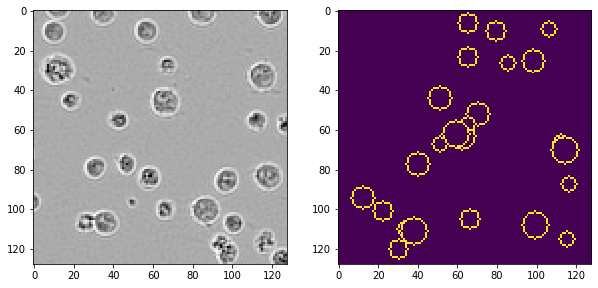

In [3]:
from src.style_transfer import draw_content

crop = 128

style_img = reference_img[:crop, :crop]
content_img = draw_content(style_img, nb_cells=25)

fig, axes = plt.subplots(figsize=(10, 6), ncols=2)

axes[0].imshow(style_img, cmap='Greys_r')
axes[1].imshow(content_img)

In [4]:
from src.style_transfer import style_transfer

outputs = []

for weight in [1e5, 5e5, 1e6, 5e6]:
    print('Weight: %.0E' % weight)
    outputs.append(style_transfer(content_img,
                                  style_img,
                                  max_iters=300,
                                  verbose=True,
                                  style_weight=weight))

Weight: 1E+05
[50]	Content loss: 2.6242	Style loss: 0.8614
[100]	Content loss: 2.5516	Style loss: 0.8042
[150]	Content loss: 2.5309	Style loss: 0.7965
[200]	Content loss: 2.5224	Style loss: 0.7929
[250]	Content loss: 2.5150	Style loss: 0.7917
[300]	Content loss: 2.5129	Style loss: 0.7889
Weight: 5E+05
[50]	Content loss: 4.2962	Style loss: 0.9166
[100]	Content loss: 3.9249	Style loss: 0.6834
[150]	Content loss: 3.8237	Style loss: 0.6505
[200]	Content loss: 3.7831	Style loss: 0.6384
[250]	Content loss: 3.7686	Style loss: 0.6308
[300]	Content loss: 3.7585	Style loss: 0.6291
Weight: 1E+06
[50]	Content loss: 4.9241	Style loss: 1.1328
[100]	Content loss: 4.4304	Style loss: 0.8007
[150]	Content loss: 4.2904	Style loss: 0.7253
[200]	Content loss: 4.2288	Style loss: 0.7007
[250]	Content loss: 4.1951	Style loss: 0.6882
[300]	Content loss: 4.1751	Style loss: 0.6839
Weight: 5E+06
[50]	Content loss: 6.5399	Style loss: 4.5298
[100]	Content loss: 5.8597	Style loss: 2.1405
[150]	Content loss: 5.5649	S

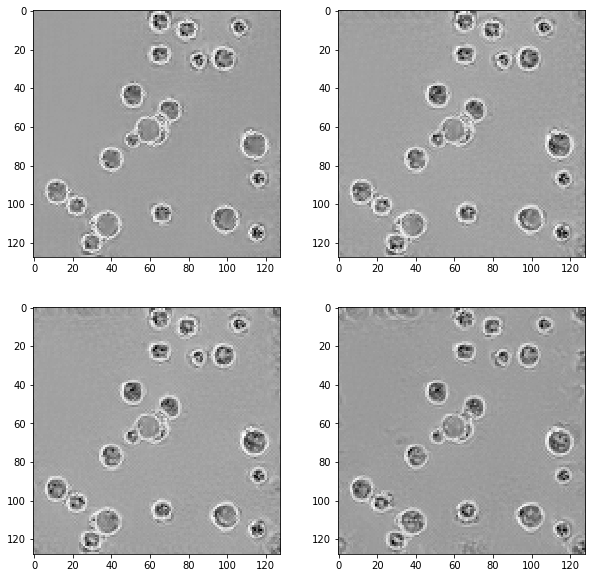

In [5]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=2, ncols=2)

for i, x_output in enumerate(outputs):

    img = x_output[0].detach().permute(1, 2, 0).numpy()
    axes[i//2][i%2].imshow(img[:, :, 0], cmap='Greys_r')

We see at lower weights the cells remain unfinished while at higher weights phantom cells appear to satisfy the stronger texture constraints. Note that 300 iterations seems sufficient in the majority of cases.

## Effect of cell numbers

In [6]:
from src.style_transfer import style_transfer

outputs = []

for nb_cells in [10, 20, 30, 50]:
    print('No. cells: %d' % nb_cells)
    content_img = draw_content(style_img, nb_cells)
    outputs.append(style_transfer(content_img,
                                  style_img,
                                  max_iters=300,
                                  verbose=True,
                                  style_weight=1e6))

No. cells: 10
[50]	Content loss: 4.6979	Style loss: 1.4282
[100]	Content loss: 4.2891	Style loss: 0.9876
[150]	Content loss: 4.1591	Style loss: 0.8897
[200]	Content loss: 4.1033	Style loss: 0.8540
[250]	Content loss: 4.0742	Style loss: 0.8372
[300]	Content loss: 4.0505	Style loss: 0.8395
No. cells: 20
[50]	Content loss: 4.7568	Style loss: 1.2026
[100]	Content loss: 4.3499	Style loss: 0.8474
[150]	Content loss: 4.2257	Style loss: 0.7614
[200]	Content loss: 4.1719	Style loss: 0.7336
[250]	Content loss: 4.1461	Style loss: 0.7182
[300]	Content loss: 4.1296	Style loss: 0.7131
No. cells: 30
[50]	Content loss: 6.2429	Style loss: 1.5928
[100]	Content loss: 5.2682	Style loss: 0.9510
[150]	Content loss: 5.0125	Style loss: 0.8313
[200]	Content loss: 4.9068	Style loss: 0.7942
[250]	Content loss: 4.8522	Style loss: 0.7786
[300]	Content loss: 4.8256	Style loss: 0.7694
No. cells: 50
[50]	Content loss: 13.1376	Style loss: 2.9533
[100]	Content loss: 8.6657	Style loss: 1.5438
[150]	Content loss: 7.3431	

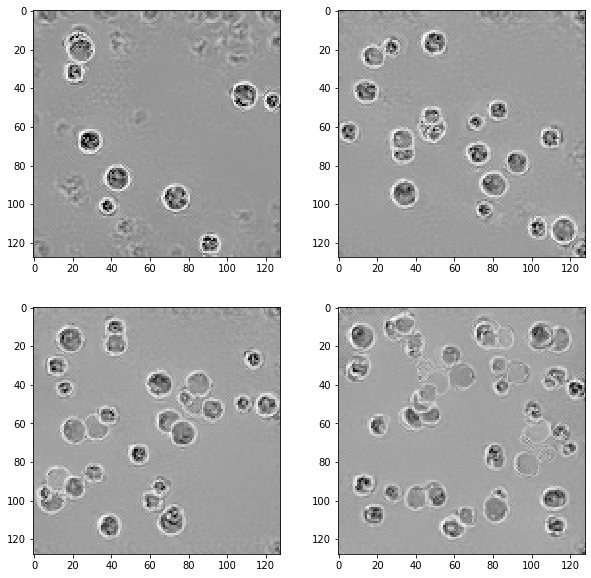

In [7]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=2, ncols=2)

for i, x_output in enumerate(outputs):

    img = x_output[0].detach().permute(1, 2, 0).numpy()
    axes[i//2][i%2].imshow(img[:, :, 0], cmap='Greys_r')

For a number of cells exceeding those in the style reference image, more and more cells go "untextured". It appears that this cannot be mitigated by increasing the style weight. For fewer cells than in the reference image, undesirable textures begin to appear in the background.

## Effect of cell size

In [8]:
from src.style_transfer import style_transfer

outputs = []

for cell_size in [5, 10, 20, 30]:
    print('Cell size: %d' % cell_size)
    content_img = draw_content(style_img, nb_cells=20, max_r=cell_size)
    outputs.append(style_transfer(content_img,
                                  style_img,
                                  max_iters=300,
                                  verbose=True,
                                  style_weight=1e6))

Cell size: 5
[50]	Content loss: 5.1504	Style loss: 1.9392
[100]	Content loss: 4.7407	Style loss: 1.0630
[150]	Content loss: 4.5251	Style loss: 0.9090
[200]	Content loss: 4.4347	Style loss: 0.8494
[250]	Content loss: 4.3820	Style loss: 0.8227
[300]	Content loss: 4.3531	Style loss: 0.8067
Cell size: 10
[50]	Content loss: 5.2317	Style loss: 1.2423
[100]	Content loss: 4.7367	Style loss: 0.8466
[150]	Content loss: 4.5681	Style loss: 0.7732
[200]	Content loss: 4.5103	Style loss: 0.7458
[250]	Content loss: 4.4856	Style loss: 0.7291
[300]	Content loss: 4.4729	Style loss: 0.7213
Cell size: 20
[50]	Content loss: 7.0237	Style loss: 1.6835
[100]	Content loss: 6.4857	Style loss: 1.2122
[150]	Content loss: 6.3024	Style loss: 1.1255
[200]	Content loss: 6.2268	Style loss: 1.0970
[250]	Content loss: 6.1890	Style loss: 1.0847
[300]	Content loss: 6.1712	Style loss: 1.0739
Cell size: 30
[50]	Content loss: 8.6065	Style loss: 2.1343
[100]	Content loss: 7.8567	Style loss: 1.4236
[150]	Content loss: 7.6433	St

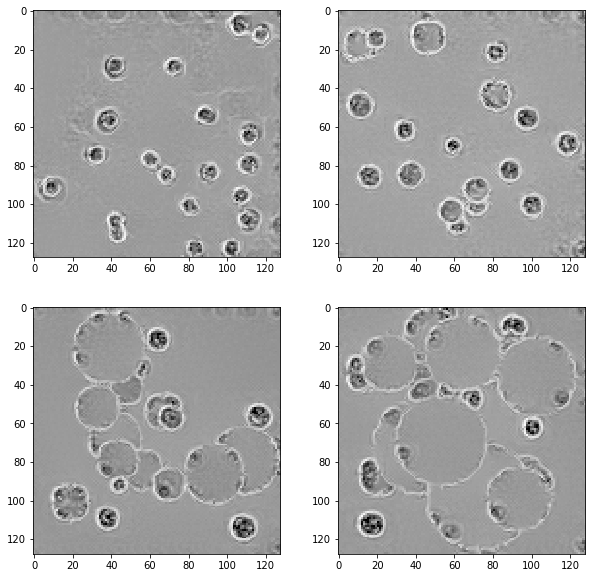

In [9]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=2, ncols=2)

for i, x_output in enumerate(outputs):

    img = x_output[0].detach().permute(1, 2, 0).numpy()
    axes[i//2][i%2].imshow(img[:, :, 0], cmap='Greys_r')

It is clear that when the cells become too large, there are no textures to support them and the style transfer fails.

## Different markers

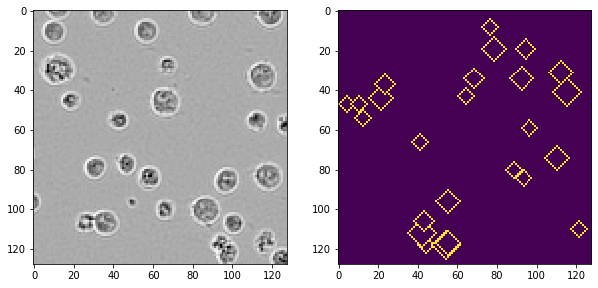

In [20]:
from src.style_transfer import draw_content

crop = 128

style_img = reference_img[:crop, :crop]
content_img = draw_content(style_img, nb_cells=25, selem='diamond')

fig, axes = plt.subplots(figsize=(10, 6), ncols=2)

axes[0].imshow(style_img, cmap='Greys_r')
axes[1].imshow(content_img)

In [23]:
from src.style_transfer import style_transfer

outputs = []

for weight in [1e5, 5e5, 1e6, 5e6]:
    print('Weight: %.0E' % weight)
    outputs.append(style_transfer(content_img,
                                  style_img,
                                  max_iters=300,
                                  verbose=True,
                                  style_weight=weight))

Weight: 1E+05
[50]	Content loss: 3.4243	Style loss: 1.1495
[100]	Content loss: 3.3381	Style loss: 1.0718
[150]	Content loss: 3.3206	Style loss: 1.0479
[200]	Content loss: 3.3119	Style loss: 1.0420
[250]	Content loss: 3.3058	Style loss: 1.0379
[300]	Content loss: 3.2996	Style loss: 1.0370
Weight: 5E+05
[50]	Content loss: 5.5165	Style loss: 1.1821
[100]	Content loss: 5.1371	Style loss: 0.8540
[150]	Content loss: 5.0311	Style loss: 0.8065
[200]	Content loss: 4.9969	Style loss: 0.7849
[250]	Content loss: 4.9731	Style loss: 0.7795
[300]	Content loss: 4.9621	Style loss: 0.7748
Weight: 1E+06
[50]	Content loss: 6.4453	Style loss: 1.6495
[100]	Content loss: 5.7972	Style loss: 1.0168
[150]	Content loss: 5.6056	Style loss: 0.8926
[200]	Content loss: 5.5334	Style loss: 0.8454
[250]	Content loss: 5.4975	Style loss: 0.8267
[300]	Content loss: 5.4754	Style loss: 0.8180
Weight: 5E+06
[50]	Content loss: 8.7158	Style loss: 6.6831
[100]	Content loss: 7.6391	Style loss: 2.6168
[150]	Content loss: 7.2010	S

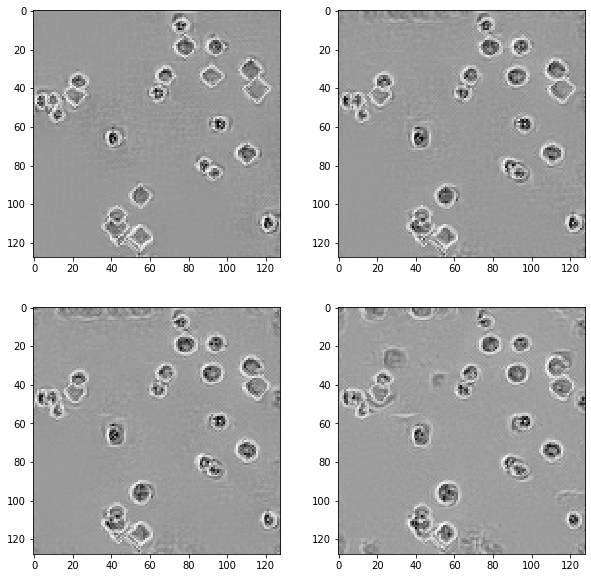

In [24]:
fig, axes = plt.subplots(figsize=(10, 10), nrows=2, ncols=2)

for i, x_output in enumerate(outputs):

    img = x_output[0].detach().permute(1, 2, 0).numpy()
    axes[i//2][i%2].imshow(img[:, :, 0], cmap='Greys_r')

## Shallow vs. deep features

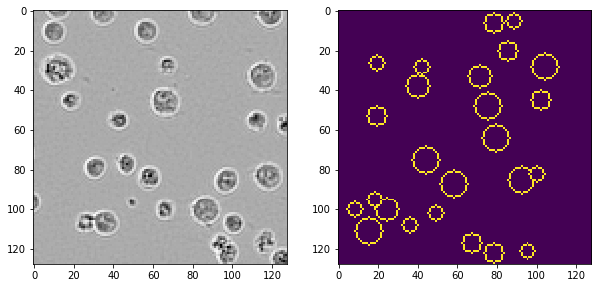

In [10]:
from src.style_transfer import draw_content

crop = 128

style_img = reference_img[:crop, :crop]
content_img = draw_content(style_img, nb_cells=25)

fig, axes = plt.subplots(figsize=(10, 6), ncols=2)

axes[0].imshow(style_img, cmap='Greys_r')
axes[1].imshow(content_img)

In [11]:
from src.style_transfer import style_transfer

outputs = []

for layers in ['shallow', 'deep']:
    print('Layers: %s' % layers)
    outputs.append(style_transfer(content_img,
                                  style_img,
                                  max_iters=300,
                                  verbose=True,
                                  layers=layers,
                                  style_weight=1e6))

Layers: shallow
[50]	Content loss: 5.0372	Style loss: 1.2401
[100]	Content loss: 4.6364	Style loss: 0.8285
[150]	Content loss: 4.5077	Style loss: 0.7474
[200]	Content loss: 4.4431	Style loss: 0.7117
[250]	Content loss: 4.4145	Style loss: 0.6991
[300]	Content loss: 4.4007	Style loss: 0.6934
Layers: deep
[50]	Content loss: 3.4088	Style loss: 14.0086
[100]	Content loss: 3.3774	Style loss: 8.0552
[150]	Content loss: 3.3739	Style loss: 6.4526
[200]	Content loss: 3.3662	Style loss: 5.6474
[250]	Content loss: 3.3560	Style loss: 5.1753
[300]	Content loss: 3.3478	Style loss: 4.8802


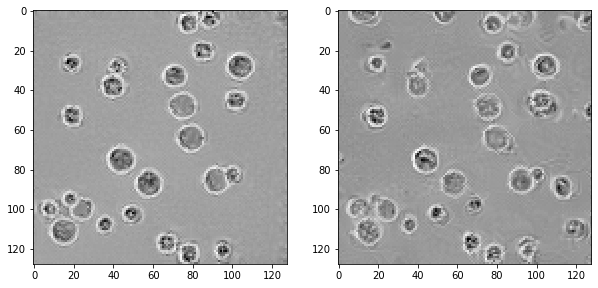

In [12]:
fig, axes = plt.subplots(figsize=(10, 10), ncols=2)

for i, x_output in enumerate(outputs):

    img = x_output[0].detach().permute(1, 2, 0).numpy()
    axes[i].imshow(img[:, :, 0], cmap='Greys_r')

Deep layer textures at times look more realstic, but they also invoke unwanted objects.

## Later frames

In [13]:
from skimage.io import imread

base_dir = '/Users/jcboyd/Data/IncuCyte_shifted/phase_contrast/'
file_name = sorted(os.listdir(base_dir))[36]
reference_img = imread(os.path.join(base_dir, file_name))

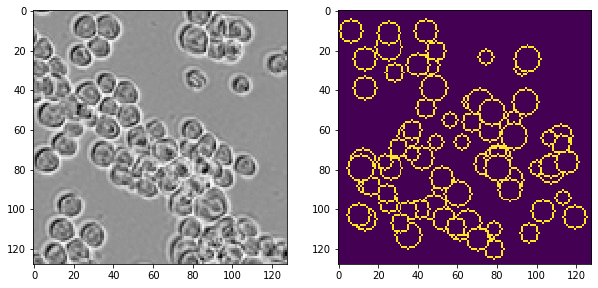

In [14]:
from src.style_transfer import draw_content

crop = 128

style_img = reference_img[-crop:, -crop:]
content_img = draw_content(style_img, nb_cells=75)

fig, axes = plt.subplots(figsize=(10, 6), ncols=2)

axes[0].imshow(style_img, cmap='Greys_r')
axes[1].imshow(content_img)

In [15]:
from src.style_transfer import style_transfer

outputs = []

for layers in ['shallow', 'deep']:
    print('Layers: %s' % layers)
    outputs.append(style_transfer(content_img,
                                  style_img,
                                  max_iters=300,
                                  verbose=True,
                                  layers=layers,
                                  style_weight=1e6))

Layers: shallow
[50]	Content loss: 17.3006	Style loss: 4.7708
[100]	Content loss: 12.8635	Style loss: 2.4716
[150]	Content loss: 11.1505	Style loss: 1.6060
[200]	Content loss: 10.4622	Style loss: 1.4169
[250]	Content loss: 10.1602	Style loss: 1.3438
[300]	Content loss: 9.9983	Style loss: 1.2975
Layers: deep
[50]	Content loss: 3.3565	Style loss: 15.0063
[100]	Content loss: 3.2898	Style loss: 8.4960
[150]	Content loss: 3.2531	Style loss: 6.8304
[200]	Content loss: 3.2223	Style loss: 6.0252
[250]	Content loss: 3.2084	Style loss: 5.5438
[300]	Content loss: 3.1903	Style loss: 5.2223


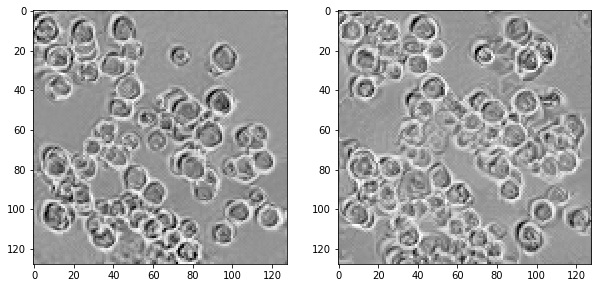

In [16]:
fig, axes = plt.subplots(figsize=(10, 10), ncols=2)

for i, x_output in enumerate(outputs):

    img = x_output[0].detach().permute(1, 2, 0).numpy()
    axes[i].imshow(img[:, :, 0], cmap='Greys_r')